In [10]:
from keras.datasets import reuters
import numpy as np

# 데이터 로드 및 전처리

In [18]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


In [19]:
word_index = reuters.get_word_index()
# word_index

In [20]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word

In [21]:
news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

In [22]:
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [23]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


- Reuters 데이터셋에서 레이블은 46개의 주제를 구분하기 위한 인덱스로 되어 있음

In [24]:
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


## 주제 레이블(y_train, y_test)의 인코딩

In [25]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 모델 구성

In [26]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [27]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

In [28]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 46)                5934      
                                                                 
Total params: 1,302,574
Trainable params: 1,302,574
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 3s 62ms/step - loss: 2.1598 - accuracy: 0.5721 - val_loss: 1.4040 - val_accuracy: 0.6959
Epoch 2/40
18/18 [==============================] - 1s 41ms/step - loss: 1.0633 - accuracy: 0.7681 - val_loss: 1.1306 - val_accuracy: 0.7400
Epoch 3/40
18/18 [==============================] - 1s 50ms/step - loss: 0.7355 - accuracy: 0.8422 - val_loss: 1.0440 - val_accuracy: 0.7538
Epoch 4/40
18/18 [==============================] - 1s 44ms/step - loss: 0.5377 - accuracy: 0.8870 - val_loss: 0.9866 - val_accuracy: 0.7729
Epoch 5/40
18/18 [==============================] - 1s 46ms/step - loss: 0.3899 - accuracy: 0.9161 - val_loss: 0.9589 - val_accuracy: 0.7760
Epoch 6/40
18/18 [==============================] - 1s 45ms/step - loss: 0.3069 - accuracy: 0.9312 - val_loss: 0.9620 - val_accuracy: 0.7872
Epoch 7/40
18/18 [==============================] - 1s 44ms/step - loss: 0.2374 - accuracy: 0.9433 - val_loss: 0.9417 - val_accuracy: 0.7992
Epoch 8/40
18

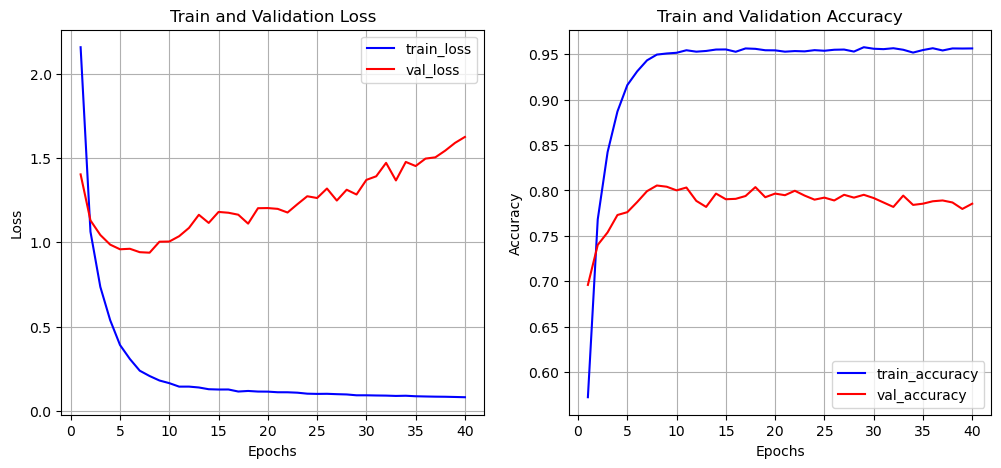

In [30]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 가중치 초기화

In [31]:
def build_model(initializer):
  model = models.Sequential()
  model.add(layers.Dense(128,
                         activation='relu', 
                         kernel_initializer=initializer,
                         input_shape=(10000, ), 
                         name='input'))
  model.add(layers.Dense(128, 
                         activation='relu', 
                         kernel_initializer=initializer,
                         name='hidden'))
  model.add(layers.Dense(46, 
                         activation='softmax', 
                         name='output'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
  return history

In [32]:
def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

In [34]:
from tensorflow.keras import initializers
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 [==============================] - 1s 52ms/step - loss: 3.8104 - accuracy: 0.1638 - val_loss: 3.7957 - val_accuracy: 0.3620
Epoch 2/40
18/18 [==============================] - 1s 40ms/step - loss: 3.7844 - accuracy: 0.3517 - val_loss: 3.7728 - val_accuracy: 0.3620
Epoch 3/40
18/18 [==============================] - 1s 42ms/step - loss: 3.7616 - accuracy: 0.3517 - val_loss: 3.7507 - val_accuracy: 0.3620
Epoch 4/40
18/18 [==============================] - 1s 43ms/step - loss: 3.7393 - accuracy: 0.3517 - val_loss: 3.7288 - val_accuracy: 0.3620
Epoch 5/40
18/18 [==============================] - 1s 47ms/step - loss: 3.7171 - accuracy: 0.3517 - val_loss: 3.7072 - val_accuracy: 0.3620
Epoch 6/40
18/18 [==============================] - 1s 41ms/step - loss: 3.6952 - accuracy: 0.3517 - val_loss: 3.6856 - val_accuracy: 0.3620
Epoch 7/40
18/18 [==============================] - 1s 45ms/step - loss: 3.6735 - accuracy: 0.3517 - val_loss: 3.6643 - val_accuracy: 0.3620
Epoch 8/40
18

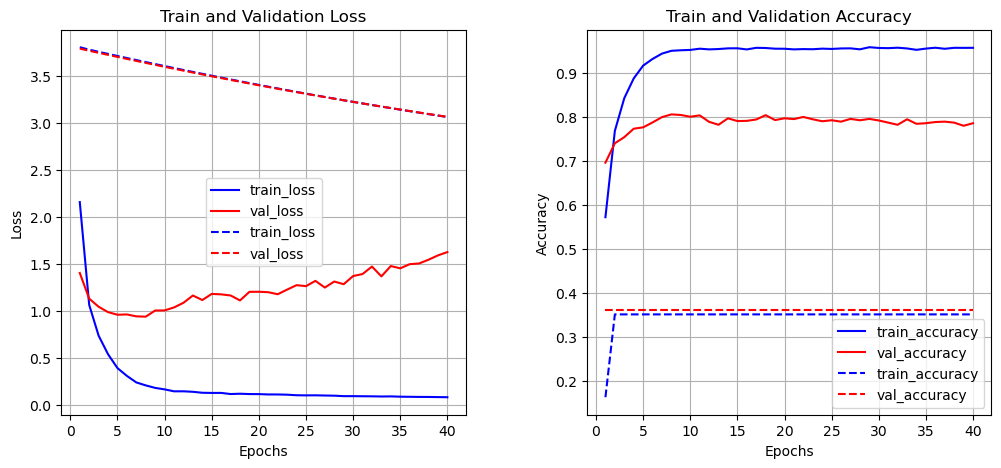

In [35]:
diff_history(history, zero_history)

In [36]:
normal_history = build_model(initializers.RandomNormal())

C:\Users\user\miniconda3\envs\tfgpuenv\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 1s 46ms/step - loss: 2.2279 - accuracy: 0.5348 - val_loss: 1.5287 - val_accuracy: 0.6483
Epoch 2/40
18/18 [==============================] - 1s 43ms/step - loss: 1.2472 - accuracy: 0.7160 - val_loss: 1.2394 - val_accuracy: 0.7315
Epoch 3/40
18/18 [==============================] - 1s 45ms/step - loss: 0.9319 - accuracy: 0.7917 - val_loss: 1.0997 - val_accuracy: 0.7533
Epoch 4/40
18/18 [==============================] - 1s 43ms/step - loss: 0.7241 - accuracy: 0.8372 - val_loss: 1.0490 - val_accuracy: 0.7542
Epoch 5/40
18/18 [==============================] - 1s 41ms/step - loss: 0.5514 - accuracy: 0.8776 - val_loss: 0.9959 - val_accuracy: 0.7769
Epoch 6/40
18/18 [==============================] - 1s 42ms/step - loss: 0.4310 - accuracy: 0.9033 - val_loss: 0.9701 - val_accuracy: 0.7876
Epoch 7/40
18/18 [==============================] - 0s 26ms/step - loss: 0.3368 - accuracy: 0.9238 - val_loss: 0.9598 - val_accuracy: 0.7947
Epoch 8/40
18

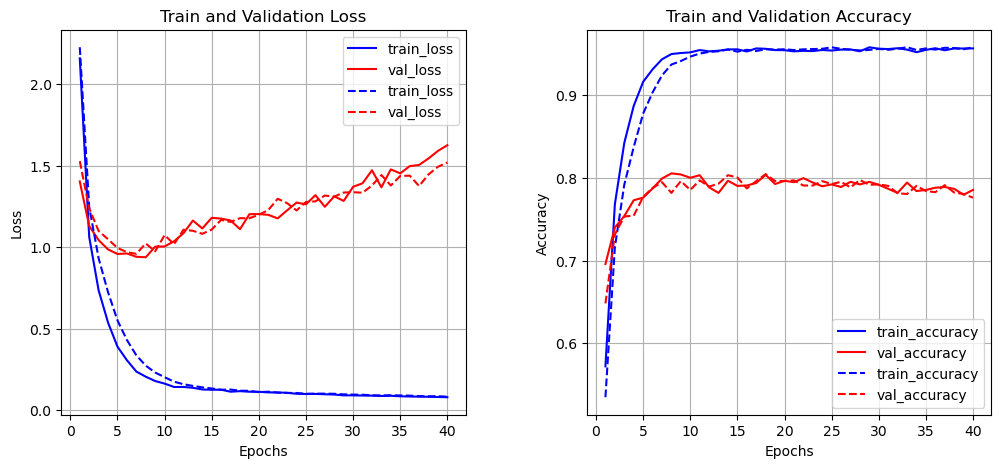

In [37]:
diff_history(history, normal_history)

In [38]:
glorot_history = build_model(initializers.GlorotNormal(seed=42))

Epoch 1/40
18/18 [==============================] - 1s 48ms/step - loss: 2.0553 - accuracy: 0.5679 - val_loss: 1.3862 - val_accuracy: 0.6848
Epoch 2/40
18/18 [==============================] - 1s 45ms/step - loss: 1.0415 - accuracy: 0.7705 - val_loss: 1.1138 - val_accuracy: 0.7409
Epoch 3/40
18/18 [==============================] - 1s 41ms/step - loss: 0.7259 - accuracy: 0.8415 - val_loss: 1.0924 - val_accuracy: 0.7382
Epoch 4/40
18/18 [==============================] - 1s 43ms/step - loss: 0.5159 - accuracy: 0.8898 - val_loss: 0.9173 - val_accuracy: 0.7907
Epoch 5/40
18/18 [==============================] - 1s 42ms/step - loss: 0.3776 - accuracy: 0.9193 - val_loss: 0.9026 - val_accuracy: 0.7943
Epoch 6/40
18/18 [==============================] - 1s 44ms/step - loss: 0.2958 - accuracy: 0.9336 - val_loss: 0.8879 - val_accuracy: 0.8063
Epoch 7/40
18/18 [==============================] - 1s 41ms/step - loss: 0.2320 - accuracy: 0.9423 - val_loss: 0.9382 - val_accuracy: 0.7939
Epoch 8/40
18

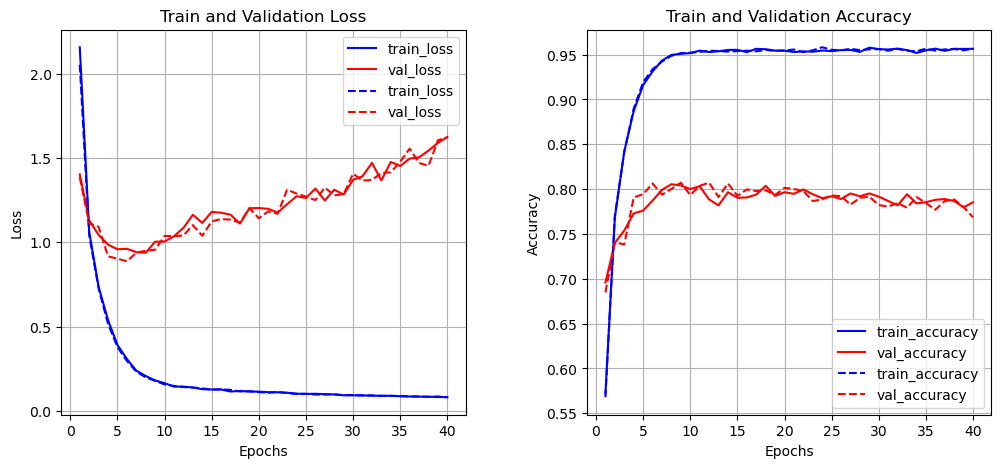

In [39]:
diff_history(history, glorot_history)

In [40]:
he_history = build_model(initializers.HeNormal(seed=42))

Epoch 1/40
18/18 [==============================] - 1s 45ms/step - loss: 2.0081 - accuracy: 0.5961 - val_loss: 1.3182 - val_accuracy: 0.7066
Epoch 2/40
18/18 [==============================] - 1s 40ms/step - loss: 0.9763 - accuracy: 0.7892 - val_loss: 1.1001 - val_accuracy: 0.7502
Epoch 3/40
18/18 [==============================] - 1s 37ms/step - loss: 0.6493 - accuracy: 0.8643 - val_loss: 0.9448 - val_accuracy: 0.7841
Epoch 4/40
18/18 [==============================] - 1s 39ms/step - loss: 0.4490 - accuracy: 0.9039 - val_loss: 0.8968 - val_accuracy: 0.7947
Epoch 5/40
18/18 [==============================] - 1s 37ms/step - loss: 0.3357 - accuracy: 0.9256 - val_loss: 0.8952 - val_accuracy: 0.8014
Epoch 6/40
18/18 [==============================] - 1s 41ms/step - loss: 0.2521 - accuracy: 0.9431 - val_loss: 0.9349 - val_accuracy: 0.8001
Epoch 7/40
18/18 [==============================] - 1s 42ms/step - loss: 0.2186 - accuracy: 0.9459 - val_loss: 0.9451 - val_accuracy: 0.7988
Epoch 8/40
18

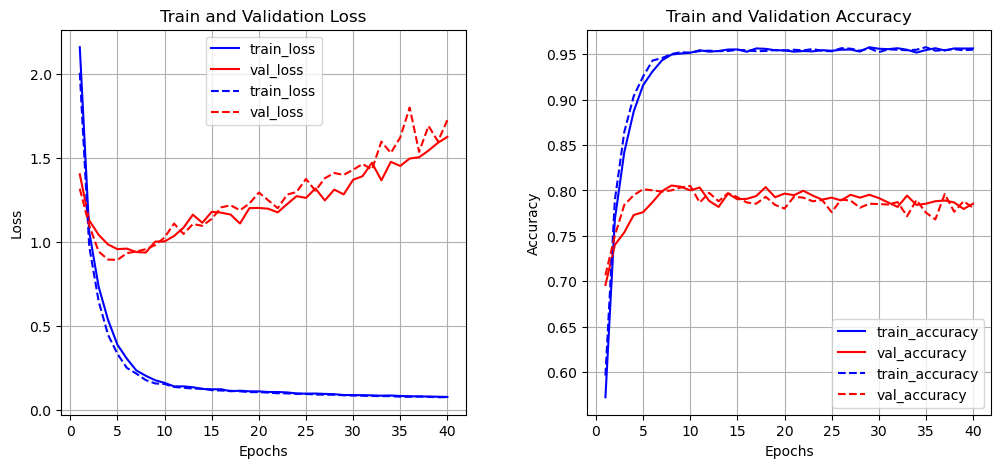

In [41]:
diff_history(history, he_history)

# 배치 정규화 

In [43]:
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 128)              

In [44]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 16ms/step - loss: 1.6809 - accuracy: 0.6644 - val_loss: 3.3269 - val_accuracy: 0.7422
Epoch 2/40
18/18 [==============================] - 0s 8ms/step - loss: 0.6297 - accuracy: 0.8759 - val_loss: 3.1631 - val_accuracy: 0.7565
Epoch 3/40
18/18 [==============================] - 0s 8ms/step - loss: 0.3388 - accuracy: 0.9339 - val_loss: 2.8643 - val_accuracy: 0.7004
Epoch 4/40
18/18 [==============================] - 0s 8ms/step - loss: 0.2247 - accuracy: 0.9470 - val_loss: 2.5433 - val_accuracy: 0.7133
Epoch 5/40
18/18 [==============================] - 0s 8ms/step - loss: 0.1733 - accuracy: 0.9519 - val_loss: 2.2530 - val_accuracy: 0.7115
Epoch 6/40
18/18 [==============================] - 0s 8ms/step - loss: 0.1495 - accuracy: 0.9513 - val_loss: 1.9238 - val_accuracy: 0.7235
Epoch 7/40
18/18 [==============================] - 0s 8ms/step - loss: 0.1338 - accuracy: 0.9516 - val_loss: 1.6847 - val_accuracy: 0.7297
Epoch 8/40
18/18 [=

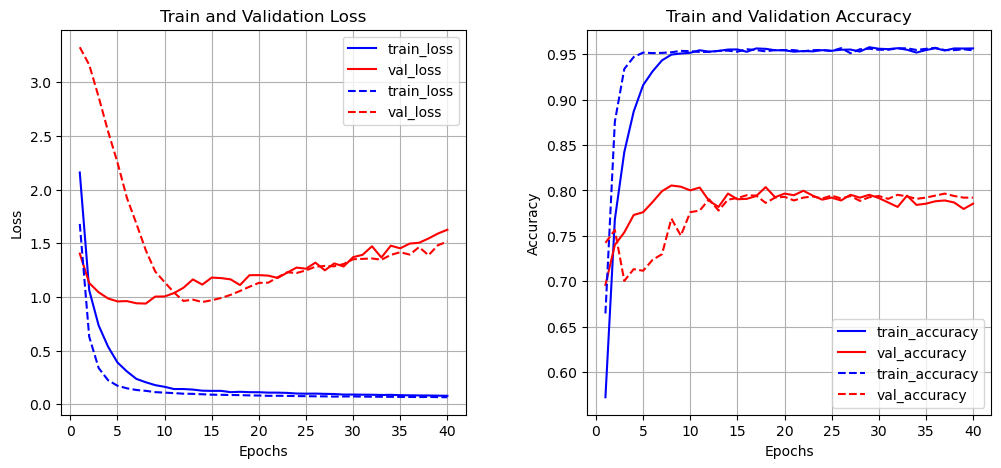

In [45]:
diff_history(history, batch_norm_history)